In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import scipy.stats as stats

1.1 Bring in the datasets

Bring in Dataset No.1 (Construction Confidence Dataset)
Bring in Dataset No.2 (Producer Price Dataset)
Bring in Dataset No.3 (Construction Industry Production Index)
Bring in Dataset No.4 (Employment expectations)
Bring in Dataset No.5 (Construction_Cost_index Dataset)

In [2]:
Construction_Confidence_All = pd.read_csv('Confidence_Indicator_IE_UK_DK.gz')
Producer_Price_Df = pd.read_csv('producer prices or costs new residential buildings IE only.gz')
Industry_Df = pd.read_csv('Industry Production Index IE DK UK- monthly data.gz')
Employment_Df = pd.read_csv('Employment Expectations IE DK.gz')
Construction_Cost_index = pd.read_csv('national_house_construction_cost_index.csv')

In [3]:
Construction_Confidence_All.head(5)

,DATAFLOW,LAST UPDATE,freq,indic,s_adj,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-01,-9.5,NaN
1,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-02,-14.6,NaN
2,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-03,-14.6,NaN
3,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-04,-30.9,NaN
4,ESTAT:EI_BSSI_M_R2(1.0),27/04/23 11:00:00,M,BS-CCI-BAL,SA,DK,1980-05,-31.0,NaN


In [4]:
Producer_Price_Df.head(5)

,DATAFLOW,LAST UPDATE,freq,indic_bt,cpa2_1,s_adj,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:STS_COPI_M(1.0),17/05/23 11:00:00,M,CSTO,CPA_F41001_X_410014,NSA,PCH_PRE,IE,2000-02,0.0,NaN
1,ESTAT:STS_COPI_M(1.0),17/05/23 11:00:00,M,CSTO,CPA_F41001_X_410014,NSA,PCH_PRE,IE,2000-03,2.3,NaN
2,ESTAT:STS_COPI_M(1.0),17/05/23 11:00:00,M,CSTO,CPA_F41001_X_410014,NSA,PCH_PRE,IE,2000-04,2.3,NaN
3,ESTAT:STS_COPI_M(1.0),17/05/23 11:00:00,M,CSTO,CPA_F41001_X_410014,NSA,PCH_PRE,IE,2000-05,2.4,NaN
4,ESTAT:STS_COPI_M(1.0),17/05/23 11:00:00,M,CSTO,CPA_F41001_X_410014,NSA,PCH_PRE,IE,2000-06,0.5,NaN


In [5]:
Industry_Df.head(5)

,DATAFLOW,LAST UPDATE,freq,unit,s_adj,nace_r2,indic,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:EI_ISIN_M(1.0),19/05/23 11:00:00,M,I2015,SCA,B-D_F,IS-IP,DK,2000-01,102.6,s
1,ESTAT:EI_ISIN_M(1.0),19/05/23 11:00:00,M,I2015,SCA,B-D_F,IS-IP,DK,2000-02,102.2,s
2,ESTAT:EI_ISIN_M(1.0),19/05/23 11:00:00,M,I2015,SCA,B-D_F,IS-IP,DK,2000-03,104.4,s
3,ESTAT:EI_ISIN_M(1.0),19/05/23 11:00:00,M,I2015,SCA,B-D_F,IS-IP,DK,2000-04,103.9,s
4,ESTAT:EI_ISIN_M(1.0),19/05/23 11:00:00,M,I2015,SCA,B-D_F,IS-IP,DK,2000-05,107.5,s


In [6]:
Employment_Df.head(5)

,DATAFLOW,LAST UPDATE,freq,unit,s_adj,indic,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:TEIBS040(1.0),27/04/23 11:00:00,M,BAL,SA,BS-CEME-BAL,DK,2022-05,-4.0,NaN
1,ESTAT:TEIBS040(1.0),27/04/23 11:00:00,M,BAL,SA,BS-CEME-BAL,DK,2022-06,-7.2,NaN
2,ESTAT:TEIBS040(1.0),27/04/23 11:00:00,M,BAL,SA,BS-CEME-BAL,DK,2022-07,-10.1,NaN
3,ESTAT:TEIBS040(1.0),27/04/23 11:00:00,M,BAL,SA,BS-CEME-BAL,DK,2022-08,-10.4,NaN
4,ESTAT:TEIBS040(1.0),27/04/23 11:00:00,M,BAL,SA,BS-CEME-BAL,DK,2022-09,-12.3,NaN


In [7]:
Construction_Cost_index.head(5)

,Unnamed: 0,NATIONAL HOUSE CONSTRUCTION COST INDEX,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Base: January 1991 = 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
2,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
3,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
4,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN


1.2 Exploratory Data Analysis

In [8]:
print(Construction_Confidence_All.shape)
print(Producer_Price_Df.shape)
print(Industry_Df.shape)
print(Employment_Df.shape)
print(Construction_Cost_index.shape)

(1455, 9)
(278, 11)
(1071, 11)
(21, 10)
(16, 24)


1.3 - Prepare the Construction Dataset to be melted

In [9]:
# Delete the first row and the yearly average row
Construction_Cost_index = Construction_Cost_index.iloc[1:14]


# Reset the headers
Construction_Cost_index.columns = Construction_Cost_index.iloc[0]
Construction_Cost_index = Construction_Cost_index[1:].reset_index(drop=True)

Construction_Cost_index.head(15)

1,Month,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016.0
0,January,109.2,113.5,115.9,118,122.9,126.3,135.8,154.3,169.9,...,198.8,207.4,208,206.9,210.2,202.5,204.1,204.9,206.2,207.4
1,February,109.3,114.1,115.7,118.5,123.1,126.4,136.1,154.7,170,...,198.8,208.2,207.3,207.2,210.5,202.6,204.2,205.4,206,207.1
2,March,109.4,114.1,115.9,118.8,123.8,126.5,136.4,155.6,169.5,...,199.4,208.6,206.8,207.3,200.7,202.7,204.3,205.4,206.5,NaN
3,April,110.3,114.1,115.9,119.8,123.8,130.5,136.5,157.4,169.5,...,200,208.9,206.5,207.9,201,203.4,204.5,205.6,206.8,NaN
4,May,110.1,114.1,115.9,119.8,124.5,130.5,136.8,157.6,169.5,...,200.1,209.4,206.5,208.7,201.2,203.6,204.5,205.9,207.2,NaN
5,June,110.6,114.1,116,119.9,124.5,130.5,136.9,157.7,169.7,...,200.3,209.9,206,208.6,201.4,203.6,204.8,206,207.6,NaN
6,July,110.7,114.5,116,120.8,125.7,131.5,137.2,161.1,173.8,...,203.7,210.4,206,209.4,201.5,204.1,204.8,206,207.4,NaN
7,August,110.9,114.5,116,121,125.7,131.5,137.2,165.9,173.9,...,203.6,210.4,206,209.6,201.9,204.1,205,206.6,207.4,NaN
8,September,112.2,115.7,116.9,121.5,126,134.1,137.7,166,173.9,...,203.7,210.5,206.1,209.5,202.1,203.7,205.1,206.4,207.3,NaN
9,October,112.7,115.8,117.1,122,126.2,134.7,153.8,169.3,173.9,...,203.8,210.1,206.2,209.5,202,203.8,205.4,206.7,207.2,NaN


Melt the construction dataset

In [10]:
# Define a dictionary to map month names to numeric values
month_dict = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}


# Reshape the dataset
Construction_Cost_index_melted = Construction_Cost_index.melt(
    id_vars='Month',
    var_name='Year',
    value_name='Data'
)

# Map month names to numeric values
Construction_Cost_index_melted['Month'] = Construction_Cost_index_melted['Month'].map(month_dict)

# Concatenate 'Year' and 'Month' columns
Construction_Cost_index_melted['Year'] = Construction_Cost_index_melted['Year'].astype(str)
Construction_Cost_index_melted['Month'] = Construction_Cost_index_melted['Month'].astype(str)
Construction_Cost_index_melted['TIME_PERIOD'] = Construction_Cost_index_melted[str('Year')] + '-' + Construction_Cost_index_melted[str('Month')]

# Bring in only the columns we're interested in
Construction_Cost_index_melted = Construction_Cost_index_melted[['TIME_PERIOD', 'Data']]

# Reset index
Construction_Cost_index_melted = Construction_Cost_index_melted.reset_index(drop=True)

##Change the datatype so that it is numeric like the others
Construction_Cost_index_melted['Data'] = Construction_Cost_index_melted['Data'].astype(float)
Construction_Cost_index_melted['TIME_PERIOD'] = Construction_Cost_index_melted['TIME_PERIOD'].astype(object)

Construction_Cost_index_melted['geo'] = 'IE'

#check output
Construction_Cost_index_melted.head(5)


,TIME_PERIOD,Data,geo
0,1994-01,109.2,IE
1,1994-02,109.3,IE
2,1994-03,109.4,IE
3,1994-04,110.3,IE
4,1994-05,110.1,IE


1.4 - Rename the columns to ensure clarity after all datasets are concatenated into one

In [11]:
Construction_Confidence_All.columns.values[7] = 'Constr_Confidence_Value'
Producer_Price_Df.columns.values[9] = 'Producer_Price_Percent_change'
Industry_Df.columns.values[9] = 'Industry_Prod_index'
Employment_Df.columns.values[8] = 'Employment_Expectation_Score'
Construction_Cost_index_melted.columns.values[1] = 'Construction_cost_index'

Construction_Cost_index_melted = Construction_Cost_index_melted.reset_index(drop=True)

#Reduce the columns to only those we need in the concatenate into one dataframe
Construction_Confidence_All = Construction_Confidence_All.iloc[:, [5,6, 7]]
Producer_Price_Df = Producer_Price_Df.iloc[:, [7,8, 9]]
Industry_Df = Industry_Df.iloc[:, [7,8, 9]]
Employment_Df = Employment_Df.iloc[:, [6,7,8]]


In [12]:
print(Construction_Cost_index_melted)

    TIME_PERIOD  Construction_cost_index geo
0       1994-01                    109.2  IE
1       1994-02                    109.3  IE
2       1994-03                    109.4  IE
3       1994-04                    110.3  IE
4       1994-05                    110.1  IE
..          ...                      ...  ..
271   2016.0-08                      NaN  IE
272   2016.0-09                      NaN  IE
273   2016.0-10                      NaN  IE
274   2016.0-11                      NaN  IE
275   2016.0-12                      NaN  IE

[276 rows x 3 columns]


I found that I needed to rename the columns after the melt operation because for some reason they weren't picked up by the concatenation function despite checking data format, column name match, hidden spaces etc.

In [13]:
Construction_Cost_index_melted.rename(columns={Construction_Cost_index_melted.columns[1]: 'Constr_cost_index'}, inplace=True)
Construction_Cost_index_melted.rename(columns={Construction_Cost_index_melted.columns[2]: 'geo'}, inplace=True)
Construction_Cost_index_melted.rename(columns={Construction_Cost_index_melted.columns[0]: 'TIME_PERIOD'}, inplace=True)


Construction_Cost_index_melted = Construction_Cost_index_melted.reset_index(drop=True)

Reordered the columns to see if it would help with the concatenation issue.

In [14]:
new_column_order = ['geo', 'TIME_PERIOD', 'Constr_cost_index']  # Specify the desired column order
Construction_Cost_index_melted = Construction_Cost_index_melted[new_column_order]

In [15]:
if 'Constr_cost_index' in Construction_Cost_index_melted.columns:
    Construction_Cost_index_melted = Construction_Cost_index_melted[new_column_order]
else:
    print("'Construction_cost_index' column not found in the DataFrame.")

In [16]:
Industry_Df.columns

Index(['geo', 'TIME_PERIOD', 'Industry_Prod_index'], dtype='object')

1.5 Merge all the datasets into one

In [17]:
merged_df = pd.merge(Construction_Confidence_All, Producer_Price_Df, on=['TIME_PERIOD', 'geo'], how='outer')
merged_df = pd.merge(merged_df, Industry_Df, on=['TIME_PERIOD', 'geo'], how='outer')
merged_df = pd.merge(merged_df, Employment_Df, on=['TIME_PERIOD', 'geo'], how='outer')
merged_df = pd.merge(merged_df, Construction_Cost_index_melted, on=['TIME_PERIOD', 'geo'], how='outer')
merged_df.describe()

,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
count,1455.000000,278.000000,1071.000000,21.000000,266.000000
mean,-11.033196,0.293525,78.557890,0.842857,172.188722
std,23.744707,0.869392,40.419902,15.286614,36.328356
min,-72.500000,-3.500000,7.100000,-15.300000,109.200000
25%,-28.050000,0.000000,51.550000,-13.600000,131.500000
50%,-9.700000,0.100000,98.000000,-7.200000,184.750000
75%,2.150000,0.600000,105.700000,14.300000,204.975000
max,52.900000,4.500000,228.400000,26.400000,210.500000


1.6 - Subsets of Irish, UK, and DK dataframes were created

In [18]:
Merged_df_UK = merged_df[merged_df['geo'] == 'UK'].copy()
Merged_df_DK = merged_df[merged_df['geo'] == 'DK'].copy()
Merged_df_IE = merged_df[merged_df['geo'] == 'IE'].copy()
Merged_df_IE.head(5)

,geo,TIME_PERIOD,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
520,IE,1985-01,-35.6,NaN,9.7,NaN,NaN
521,IE,1985-02,-37.1,NaN,9.6,NaN,NaN
522,IE,1985-03,-35.3,NaN,10.1,NaN,NaN
523,IE,1985-04,-29.2,NaN,9.7,NaN,NaN
524,IE,1985-05,-30.0,NaN,9.6,NaN,NaN


1.7 - EDA of Irish Dataset

In [19]:
Merged_df_IE.shape

(531, 7)

In [20]:
Merged_df_IE.describe()

,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
count,457.000000,278.000000,519.000000,9.000000,266.000000
mean,0.909409,0.293525,50.958382,17.366667,172.188722
std,28.335961,0.869392,42.793446,5.588381,36.328356
min,-72.500000,-3.500000,7.100000,11.200000,109.200000
25%,-24.000000,0.000000,13.850000,13.300000,131.500000
50%,8.100000,0.100000,48.700000,14.900000,184.750000
75%,23.000000,0.600000,64.200000,22.600000,204.975000
max,52.900000,4.500000,228.400000,26.400000,210.500000


1.8 - EDA

In [21]:
Merged_df_IE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 520 to 1540
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   geo                            531 non-null    object 
 1   TIME_PERIOD                    531 non-null    object 
 2   Constr_Confidence_Value        457 non-null    float64
 3   Producer_Price_Percent_change  278 non-null    float64
 4   Industry_Prod_index            519 non-null    float64
 5   Employment_Expectation_Score   9 non-null      float64
 6   Constr_cost_index              266 non-null    float64
dtypes: float64(5), object(2)
memory usage: 33.2+ KB


In [22]:
# Find the first observation without a null value in the 'Producer_Price_Percent_change' column
first_valid_index = Merged_df_IE['Producer_Price_Percent_change'].first_valid_index()
first_valid_observation = Merged_df_IE.loc[first_valid_index]
print("First observation without a null value:")
print(first_valid_observation)

First observation without a null value:
geo                                   IE
TIME_PERIOD                      2000-02
Constr_Confidence_Value             48.2
Producer_Price_Percent_change        0.0
Industry_Prod_index                 37.8
Employment_Expectation_Score         NaN
Constr_cost_index                  136.1
Name: 701, dtype: object


In [23]:
Merged_df_IE.duplicated().sum()

0

In [24]:
Merged_df_IE.head(15)

,geo,TIME_PERIOD,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
520,IE,1985-01,-35.6,NaN,9.7,NaN,NaN
521,IE,1985-02,-37.1,NaN,9.6,NaN,NaN
522,IE,1985-03,-35.3,NaN,10.1,NaN,NaN
523,IE,1985-04,-29.2,NaN,9.7,NaN,NaN
524,IE,1985-05,-30.0,NaN,9.6,NaN,NaN
525,IE,1985-06,-30.0,NaN,9.4,NaN,NaN
526,IE,1985-07,-29.7,NaN,9.5,NaN,NaN
527,IE,1985-08,-27.9,NaN,9.2,NaN,NaN
528,IE,1985-09,-28.8,NaN,9.5,NaN,NaN
529,IE,1985-10,-31.7,NaN,9.4,NaN,NaN


In [25]:
Merged_df_IE.tail(15)

,geo,TIME_PERIOD,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
1514,IE,1984-10,NaN,NaN,9.5,NaN,NaN
1515,IE,1984-11,NaN,NaN,9.7,NaN,NaN
1516,IE,1984-12,NaN,NaN,10.0,NaN,NaN
1529,IE,2016.0-01,NaN,NaN,NaN,NaN,207.4
1530,IE,2016.0-02,NaN,NaN,NaN,NaN,207.1
1531,IE,2016.0-03,NaN,NaN,NaN,NaN,NaN
1532,IE,2016.0-04,NaN,NaN,NaN,NaN,NaN
1533,IE,2016.0-05,NaN,NaN,NaN,NaN,NaN
1534,IE,2016.0-06,NaN,NaN,NaN,NaN,NaN
1535,IE,2016.0-07,NaN,NaN,NaN,NaN,NaN


1.9 - Data Cleansing and Preparation

In [26]:
filtered_df = pd.DataFrame(columns=Merged_df_IE.columns)  # Create an empty DataFrame to store filtered rows
removed_df = pd.DataFrame(columns=Merged_df_IE.columns)  # Create an empty DataFrame to store removed rows

for index, row in Merged_df_IE.iterrows():
    try:
        year = int(row['TIME_PERIOD'][:4])
        month = int(row['TIME_PERIOD'][5:7])
        if 1980 <= year <= 2023 and 1 <= month <= 12:
            filtered_df = filtered_df.append(row, ignore_index=True)
        else:
            removed_df = removed_df.append(row, ignore_index=True)
    except (ValueError, IndexError):
        removed_df = removed_df.append(row, ignore_index=True)


filtered_df.shape

(519, 7)

In [27]:
#rename the filtered dataset back to original title Merged_df_IE
Merged_df_IE = filtered_df

In [28]:
print(removed_df)

   geo TIME_PERIOD  Constr_Confidence_Value  Producer_Price_Percent_change  \
0   IE   2016.0-01                      NaN                            NaN   
1   IE   2016.0-02                      NaN                            NaN   
2   IE   2016.0-03                      NaN                            NaN   
3   IE   2016.0-04                      NaN                            NaN   
4   IE   2016.0-05                      NaN                            NaN   
5   IE   2016.0-06                      NaN                            NaN   
6   IE   2016.0-07                      NaN                            NaN   
7   IE   2016.0-08                      NaN                            NaN   
8   IE   2016.0-09                      NaN                            NaN   
9   IE   2016.0-10                      NaN                            NaN   
10  IE   2016.0-11                      NaN                            NaN   
11  IE   2016.0-12                      NaN                     

1.10 - convert the Time Period to Date format so that it can be analysed as a date

In [29]:
#Sort the time period field to ensure it is chronological
Merged_df_IE['TIME_PERIOD'] = pd.to_datetime(Merged_df_IE['TIME_PERIOD'], format='%Y-%m')

# Sort the DataFrame by the 'date_column' in chronological order
Merged_df_IE.sort_values('TIME_PERIOD', inplace=True)

# Reset the index of the DataFrame
Merged_df_IE.reset_index(drop=True, inplace=True)

In [30]:
# Find the first observation without a null value in the 'Producer_Price_Percent_change' column
first_valid_index = Merged_df_IE['Producer_Price_Percent_change'].first_valid_index()
first_valid_observation = Merged_df_IE.loc[first_valid_index]
print("First observation without a null value:")
print(first_valid_observation)

First observation without a null value:
geo                                               IE
TIME_PERIOD                      2000-02-01 00:00:00
Constr_Confidence_Value                         48.2
Producer_Price_Percent_change                    0.0
Industry_Prod_index                             37.8
Employment_Expectation_Score                     NaN
Constr_cost_index                              136.1
Name: 241, dtype: object


1.11 - backup the dataframe so that it can be accessed later in the project if needs be (for example if TimeSeries algorithm needs more historical data for a given column in the backup dataframe)

In [31]:
Merged_df_IE_backup = Merged_df_IE #Back up the dataset so that the historical records around construction confience/sentiment could be accessed later

first_valid_index = Merged_df_IE['Producer_Price_Percent_change'].first_valid_index()
Merged_df_IE = Merged_df_IE.loc[first_valid_index:]
Merged_df_IE.shape

(278, 7)

In [32]:
Merged_df_IE.head(10)

,geo,TIME_PERIOD,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
241,IE,2000-02-01,48.2,0.0,37.8,NaN,136.1
242,IE,2000-03-01,49.0,2.3,39.0,NaN,136.4
243,IE,2000-04-01,31.2,2.3,42.1,NaN,136.5
244,IE,2000-05-01,39.0,2.4,42.4,NaN,136.8
245,IE,2000-06-01,35.7,0.5,42.8,NaN,136.9
246,IE,2000-07-01,34.1,1.4,44.9,NaN,137.2
247,IE,2000-08-01,35.1,2.0,43.6,NaN,137.2
248,IE,2000-09-01,34.8,1.1,44.6,NaN,137.7
249,IE,2000-10-01,41.9,0.4,47.2,NaN,153.8
250,IE,2000-11-01,31.1,1.8,49.1,NaN,153.8


In [33]:
Merged_df_IE = Merged_df_IE.dropna(subset=['Constr_Confidence_Value'])
Merged_df_DK = Merged_df_DK.dropna(subset=['Constr_Confidence_Value'])
Merged_df_UK = Merged_df_UK.dropna(subset=['Constr_Confidence_Value'])


# 2. Statistics

In [35]:
##First bring the other two datasets against which we're performing an Irish comparison into the same format as IE
Merged_df_UK['TIME_PERIOD'] = pd.to_datetime(Merged_df_UK['TIME_PERIOD'], format='%Y-%m')
Merged_df_DK['TIME_PERIOD'] = pd.to_datetime(Merged_df_DK['TIME_PERIOD'], format='%Y-%m')

Merged_df_UK = Merged_df_UK[Merged_df_UK['TIME_PERIOD'].isin(Merged_df_IE['TIME_PERIOD'].unique())]
Merged_df_DK = Merged_df_DK[Merged_df_DK['TIME_PERIOD'].isin(Merged_df_IE['TIME_PERIOD'].unique())]

2.1 Histogram of Construction Confidence Value

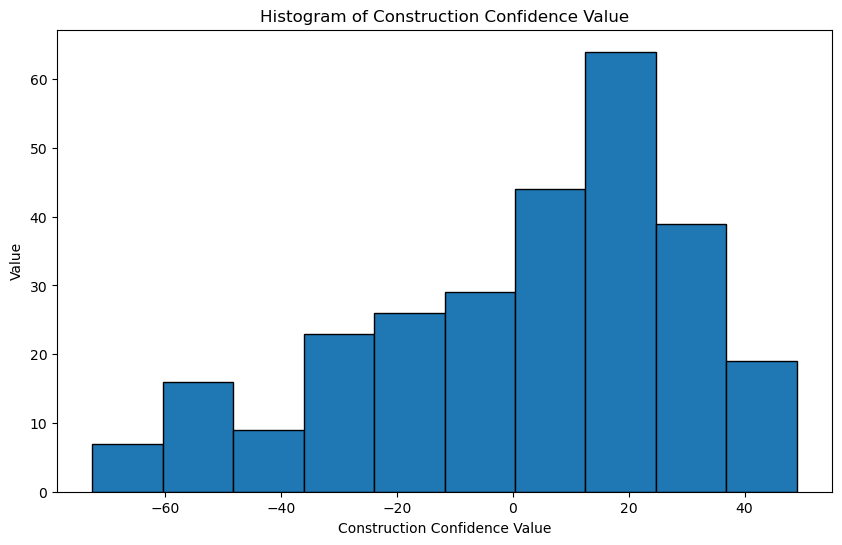

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(Merged_df_IE['Constr_Confidence_Value'], bins=10, edgecolor='black')
plt.xlabel('Construction Confidence Value')
plt.ylabel('Value')
plt.title('Histogram of Construction Confidence Value')
plt.show()

2.2 Perform a .describe to discuss the statistics

In [37]:
Merged_df_IE.describe()

,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
count,276.000000,276.000000,276.000000,9.000000,191.000000
mean,1.765942,0.291304,80.622464,17.366667,191.793194
std,28.229057,0.870108,36.304223,5.588381,19.312358
min,-72.500000,-3.500000,37.800000,11.200000,136.100000
25%,-16.775000,0.000000,57.875000,13.300000,179.650000
50%,9.750000,0.100000,63.300000,14.900000,202.000000
75%,22.400000,0.600000,99.975000,22.600000,206.200000
max,49.000000,4.500000,228.400000,26.400000,210.500000


In [38]:
Merged_df_UK.describe()

,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
count,237.000000,0.0,237.000000,0.0,0.0
mean,-14.624473,NaN,101.859072,NaN,NaN
std,17.706146,NaN,4.090436,NaN,NaN
min,-62.500000,NaN,93.000000,NaN,NaN
25%,-26.600000,NaN,99.100000,NaN,NaN
50%,-6.200000,NaN,102.900000,NaN,NaN
75%,-2.600000,NaN,105.300000,NaN,NaN
max,8.500000,NaN,109.000000,NaN,NaN


In [39]:
Merged_df_DK.describe()

,Constr_Confidence_Value,Producer_Price_Percent_change,Industry_Prod_index,Employment_Expectation_Score,Constr_cost_index
count,276.000000,0.0,276.000000,9.000000,0.0
mean,-14.353623,NaN,107.419203,-11.077778,NaN
std,14.996776,NaN,8.639349,3.549217,NaN
min,-55.700000,NaN,90.200000,-14.200000,NaN
25%,-23.000000,NaN,99.750000,-13.700000,NaN
50%,-12.350000,NaN,108.000000,-12.300000,NaN
75%,-3.900000,NaN,111.400000,-10.100000,NaN
max,16.100000,NaN,146.700000,-4.000000,NaN


2.3 - Volitility of each country visualised

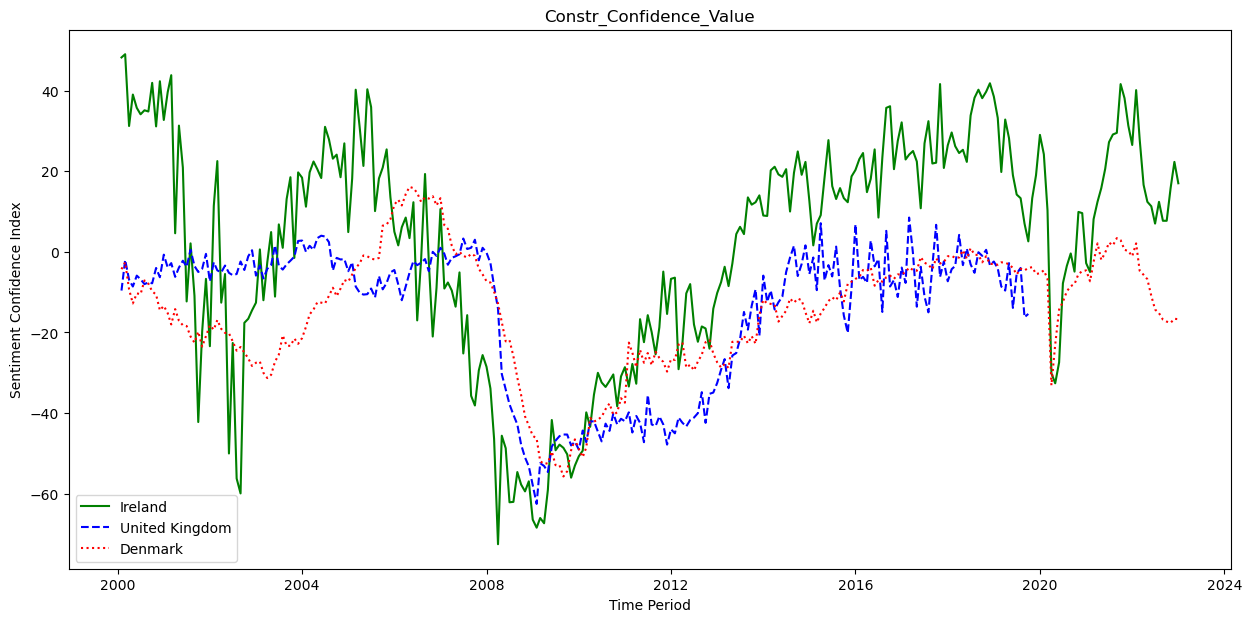

In [40]:
import matplotlib.pyplot as plt

# Combine the datasets
combined_data = pd.concat([Merged_df_IE, Merged_df_UK, Merged_df_DK])

# Plot the combined data
#plt.plot(combined_data['TIME_PERIOD'], combined_data['Constr_Confidence_Value'], label='Combined Data')

plt.figure(figsize=(15, 7))  

# Customize the plot
plt.title('Constr_Confidence_Value')
plt.xlabel('Time Period')
plt.ylabel('Sentiment Confidence Index')


plt.plot(Merged_df_IE['TIME_PERIOD'], Merged_df_IE['Constr_Confidence_Value'], label='Ireland', linestyle='-', color='green')
plt.plot(Merged_df_UK['TIME_PERIOD'], Merged_df_UK['Constr_Confidence_Value'], label='United Kingdom', linestyle='--', color='blue')
plt.plot(Merged_df_DK['TIME_PERIOD'], Merged_df_DK['Constr_Confidence_Value'], label='Denmark', linestyle=':', color='red')


plt.legend()

# Show the plot
#plt.show()

2.4 Shapiro-Wilk test

In [41]:
# Extract the Constr_Confidence_Value
constr_confidence_ie = Merged_df_IE['Constr_Confidence_Value']
constr_confidence_uk = Merged_df_UK['Constr_Confidence_Value']
constr_confidence_dk = Merged_df_DK['Constr_Confidence_Value']

# Perform Shapiro-Wilk test
stat_ie, p_value_ie = stats.shapiro(constr_confidence_ie)
stat_uk, p_value_uk = stats.shapiro(constr_confidence_uk)
stat_dk, p_value_dk = stats.shapiro(constr_confidence_dk)

# Print the results
print("Shapiro-Wilk Test - IE Dataset:")
print("Test Statistic:", stat_ie)
print("P-Value:", p_value_ie)
print("")

print("Shapiro-Wilk Test - UK Dataset:")
print("Test Statistic:", stat_uk)
print("P-Value:", p_value_uk)
print("")

print("Shapiro-Wilk Test - DK Dataset:")
print("Test Statistic:", stat_dk)
print("P-Value:", p_value_dk)

Shapiro-Wilk Test - IE Dataset:
Test Statistic: 0.9410058259963989
P-Value: 4.591249602725611e-09

Shapiro-Wilk Test - UK Dataset:
Test Statistic: 0.8102643489837646
P-Value: 2.7063443818603743e-16

Shapiro-Wilk Test - DK Dataset:
Test Statistic: 0.962189793586731
P-Value: 1.268437586077198e-06


2.5 Normal Distribution plots

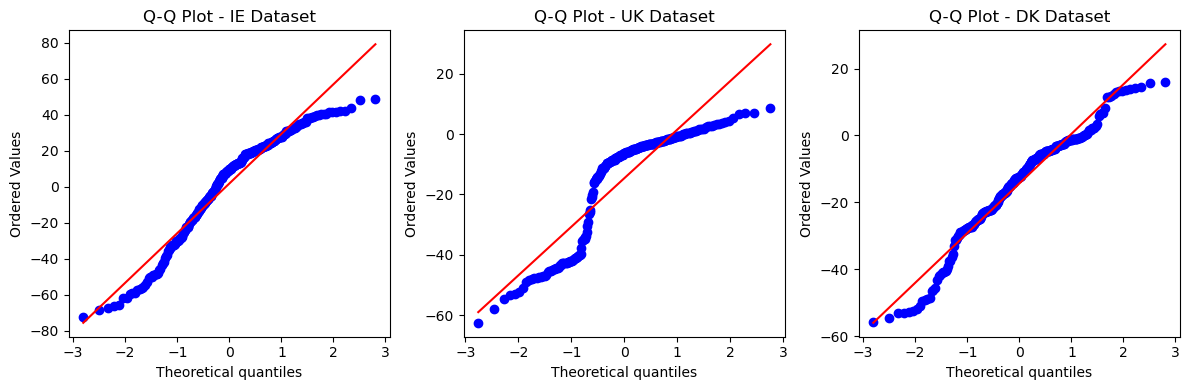

In [42]:
import matplotlib.pyplot as plt
import scipy.stats as stats


# Extract the variable of interest
constr_confidence_ie = Merged_df_IE['Constr_Confidence_Value']
constr_confidence_uk = Merged_df_UK['Constr_Confidence_Value']
constr_confidence_dk = Merged_df_DK['Constr_Confidence_Value']

# Create Q-Q plots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Q-Q plot for IE dataset
stats.probplot(constr_confidence_ie, dist="norm", plot=axes[0])
axes[0].set_title("Q-Q Plot - IE Dataset")

# Q-Q plot for UK dataset
stats.probplot(constr_confidence_uk, dist="norm", plot=axes[1])
axes[1].set_title("Q-Q Plot - UK Dataset")

# Q-Q plot for DK dataset
stats.probplot(constr_confidence_dk, dist="norm", plot=axes[2])
axes[2].set_title("Q-Q Plot - DK Dataset")

plt.tight_layout()
plt.show()

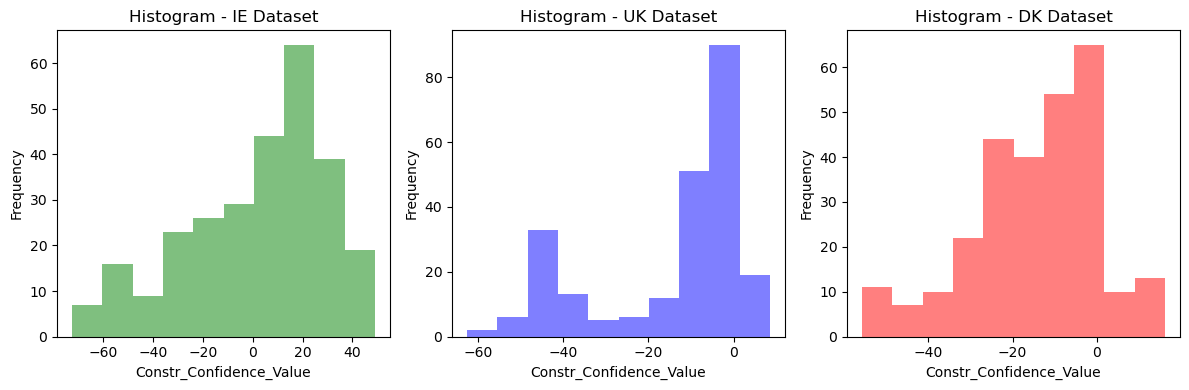

In [43]:
#Extract the variable of interest
constr_confidence_ie = Merged_df_IE['Constr_Confidence_Value']
constr_confidence_uk = Merged_df_UK['Constr_Confidence_Value']
constr_confidence_dk = Merged_df_DK['Constr_Confidence_Value']

# Create histograms
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Histogram for IE dataset
axes[0].hist(constr_confidence_ie, bins=10, color='green', alpha=0.5)
axes[0].set_title("Histogram - IE Dataset")
axes[0].set_xlabel("Constr_Confidence_Value")
axes[0].set_ylabel("Frequency")

# Histogram for UK dataset
axes[1].hist(constr_confidence_uk, bins=10, color='blue', alpha=0.5)
axes[1].set_title("Histogram - UK Dataset")
axes[1].set_xlabel("Constr_Confidence_Value")
axes[1].set_ylabel("Frequency")

# Histogram for DK dataset
axes[2].hist(constr_confidence_dk, bins=10, color='red', alpha=0.5)
axes[2].set_title("Histogram - DK Dataset")
axes[2].set_xlabel("Constr_Confidence_Value")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

2.6 - Confidence Interval for Ireland

In [44]:


# Extract the values from the "Constr_Confidence_Value" column
values = Merged_df_IE['Constr_Confidence_Value']

# Calculate the sample mean and standard error
sample_mean = np.mean(values)
standard_error = stats.sem(values)

# Choose the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error and the lower/upper bounds
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, len(values) - 1) * standard_error
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Print the confidence interval
print(f"Confidence Interval for Ireland ({confidence_level * 100}%): ({lower_bound}, {upper_bound})")

Confidence Interval for Ireland (95.0%): (-1.5791298367651585, 5.111013894736162)


In [45]:
# Extract the values from the "Constr_Confidence_Value" column
values = Merged_df_UK['Constr_Confidence_Value']

# Calculate the sample mean and standard error
sample_mean = np.mean(values)
standard_error = stats.sem(values)

# Choose the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error and the lower/upper bounds
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, len(values) - 1) * standard_error
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Print the confidence interval
print(f"Confidence Interval for the UK ({confidence_level * 100}%): ({lower_bound}, {upper_bound})")

Confidence Interval for the UK (95.0%): (-16.890320928723483, -12.358624218955848)


In [46]:
# Extract the values from the "Constr_Confidence_Value" column
values = Merged_df_DK['Constr_Confidence_Value']

# Calculate the sample mean and standard error
sample_mean = np.mean(values)
standard_error = stats.sem(values)

# Choose the desired confidence level (e.g., 95%)
confidence_level = 0.95

# Calculate the margin of error and the lower/upper bounds
margin_of_error = stats.t.ppf((1 + confidence_level) / 2, len(values) - 1) * standard_error
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Print the confidence interval
print(f"Confidence Interval for Denmark ({confidence_level * 100}%): ({lower_bound}, {upper_bound})")

Confidence Interval for Denmark (95.0%): (-16.130703266670146, -12.576543110141452)


2.7 Correlation Coefficient

In [47]:
correlation = Merged_df_IE['Constr_Confidence_Value'].corr(Merged_df_IE['Industry_Prod_index'])

print(f"Correlation coefficient: {correlation}")

Correlation coefficient: 0.3055670916482125


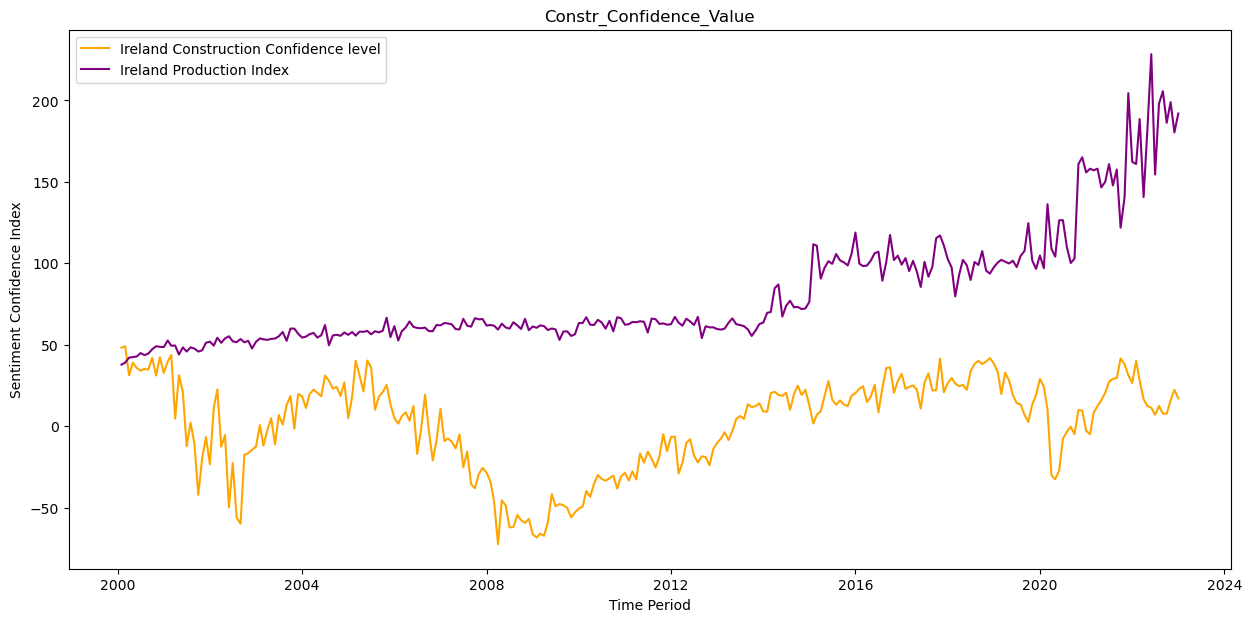

In [48]:
import matplotlib.pyplot as plt

# Combine the datasets
combined_data = pd.concat([Merged_df_IE, Merged_df_UK, Merged_df_DK])


plt.figure(figsize=(15, 7))  

# Customize the plot
plt.title('Constr_Confidence_Value')
plt.xlabel('Time Period')
plt.ylabel('Sentiment Confidence Index')


plt.plot(Merged_df_IE['TIME_PERIOD'], Merged_df_IE['Constr_Confidence_Value'], label='Ireland Construction Confidence level', linestyle='-', color='orange')
plt.plot(Merged_df_IE['TIME_PERIOD'], Merged_df_IE['Industry_Prod_index'], label='Ireland Production Index', linestyle='-', color='purple')


plt.legend()

# Show the plot
#plt.show()

2.8 Inferential Statistics

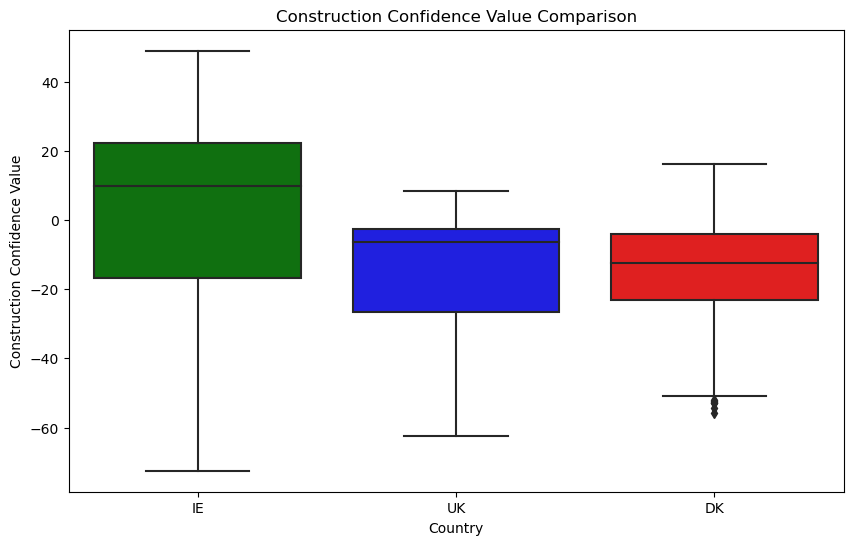

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the datasets
combined_data = pd.concat([Merged_df_IE, Merged_df_UK, Merged_df_DK])

# Define a color palette for each dataset
colors = {'IE': 'green', 'UK': 'blue', 'DK': 'red'}


# Check if each dataset is present in the 'geo' column and assign colors
#This is written this way because initially it was not running for me
if 'IE' in combined_data['geo']:
    colors['IE'] = 'green'
if 'UK' in combined_data['geo']:
    colors['UK'] = 'blue'
if 'DK' in combined_data['geo']:
    colors['DK'] = 'red'

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_data['geo'], y=combined_data['Constr_Confidence_Value'], palette=colors)

# Customize the plot
plt.title('Construction Confidence Value Comparison')
plt.xlabel('Country')
plt.ylabel('Construction Confidence Value')

# Show the plot
plt.show()

2.9 - Anova

In [50]:
# Extract the variable of interest
constr_confidence_ie = Merged_df_IE['Constr_Confidence_Value']
constr_confidence_uk = Merged_df_UK['Constr_Confidence_Value']
constr_confidence_dk = Merged_df_DK['Constr_Confidence_Value']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(constr_confidence_ie, constr_confidence_uk, constr_confidence_dk)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", "{:.23f}".format(p_value))

F-Statistic: 52.438383961584805
P-Value: 0.00000000000000000000042


2.10 - T-Tests

In [51]:
import scipy.stats as stats


# Extract the variable of interest
constr_confidence_ie = Merged_df_IE['Constr_Confidence_Value']
constr_confidence_uk = Merged_df_UK['Constr_Confidence_Value']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(constr_confidence_ie, constr_confidence_uk)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", "{:.15f}".format(p_value))

T-Statistic: 7.7275266360587995
P-Value: 0.000000000000059


In [52]:
constr_confidence_ie = Merged_df_IE['Constr_Confidence_Value']
constr_confidence_uk = Merged_df_DK['Constr_Confidence_Value']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(constr_confidence_ie, constr_confidence_uk)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", "{:.15f}".format(p_value))

T-Statistic: 8.37777211390226
P-Value: 0.000000000000000


In [53]:
constr_confidence_uk = Merged_df_UK['Constr_Confidence_Value']
constr_confidence_dk = Merged_df_DK['Constr_Confidence_Value']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(constr_confidence_uk, constr_confidence_dk)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", "{:.15f}".format(p_value))

T-Statistic: -0.1875860623222992
P-Value: 0.851275613943720


2.11 - Boxplot showing comparison of the means

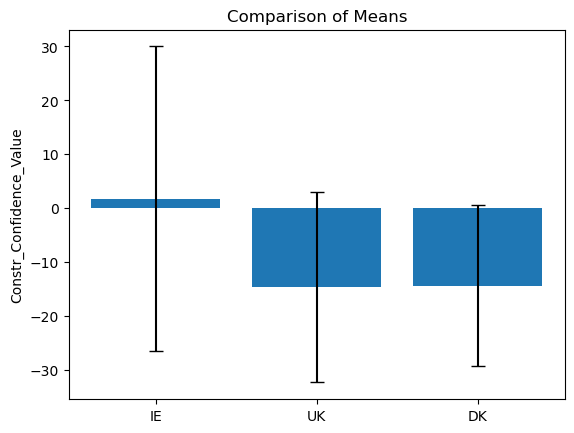

In [54]:
constr_confidence_ie = Merged_df_IE['Constr_Confidence_Value']
constr_confidence_uk = Merged_df_UK['Constr_Confidence_Value']
constr_confidence_dk = Merged_df_DK['Constr_Confidence_Value']


# Calculate means and standard deviations

mean_ie = constr_confidence_ie.mean()
mean_uk = constr_confidence_uk.mean()
mean_dk = constr_confidence_dk.mean()
std_ie = constr_confidence_ie.std()
std_uk = constr_confidence_uk.std()
std_dk = constr_confidence_dk.std()

# Plot the grouped bar plot
fig, ax = plt.subplots()
ax.bar(['IE', 'UK', 'DK'], [mean_ie, mean_uk, mean_dk], yerr=[std_ie, std_uk, std_dk], capsize=5)
ax.set_ylabel('Constr_Confidence_Value')
ax.set_title('Comparison of Means')
plt.show()

2.12 - Wilcoxons test

In [55]:
##Create sub dataframes which have equal length because that's a requirements for Wilcoxon

Merged_df_IE_Wil = Merged_df_IE[Merged_df_IE['TIME_PERIOD'].isin(Merged_df_UK['TIME_PERIOD'].unique())]


constr_confidence_ie = Merged_df_IE_Wil['Constr_Confidence_Value']
constr_confidence_uk = Merged_df_UK['Constr_Confidence_Value']

# Perform Wilcoxon test
statistic, p_value = stats.wilcoxon(constr_confidence_ie, constr_confidence_uk)

# Print the results
print("Wilcoxon Test")
print("Statistic:", statistic)
print("P-Value:", p_value)

Wilcoxon Test
Statistic: 4691.0
P-Value: 5.264181831272456e-19


In [56]:
Merged_df_IE_Wil = Merged_df_IE[Merged_df_IE['TIME_PERIOD'].isin(Merged_df_DK['TIME_PERIOD'].unique())]


constr_confidence_ie = Merged_df_IE_Wil['Constr_Confidence_Value']
constr_confidence_dk = Merged_df_DK['Constr_Confidence_Value']

# Perform Wilcoxon test
statistic, p_value = stats.wilcoxon(constr_confidence_ie, constr_confidence_dk)

# Print the results
print("Wilcoxon Test")
print("Statistic:", statistic)
print("P-Value:", p_value)

Wilcoxon Test
Statistic: 5789.0
P-Value: 1.7025989235868648e-23


In [57]:
Merged_df_DK_Wil = Merged_df_DK[Merged_df_DK['TIME_PERIOD'].isin(Merged_df_UK['TIME_PERIOD'].unique())]


constr_confidence_dk = Merged_df_DK_Wil['Constr_Confidence_Value']
constr_confidence_uk = Merged_df_UK['Constr_Confidence_Value']

# Perform Wilcoxon test
statistic, p_value = stats.wilcoxon(constr_confidence_dk, constr_confidence_uk)

# Print the results
print("Wilcoxon Test")
print("Statistic:", statistic)
print("P-Value:", p_value)

Wilcoxon Test
Statistic: 13194.5
P-Value: 0.3906550686609165


2.13 Pearson's Test

In [58]:
# Extract the variable from each dataset
Merged_df_IE_PEA = Merged_df_IE[Merged_df_IE['TIME_PERIOD'].isin(Merged_df_UK['TIME_PERIOD'].unique())]

x = Merged_df_IE_PEA['Constr_Confidence_Value']
y = Merged_df_UK['Constr_Confidence_Value']

# Perform Pearson's correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(x, y)

# Print the results
print("Pearson's Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)

Pearson's Correlation Coefficient: 0.6707479160401071
P-Value: 2.447985016377695e-32


In [59]:
# Extract the variable from each dataset
x = Merged_df_IE['Constr_Confidence_Value']
y = Merged_df_DK['Constr_Confidence_Value']

# Perform Pearson's correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(x, y)

# Print the results
print("Pearson's Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)

Pearson's Correlation Coefficient: 0.6557669311899856
P-Value: 2.60347471224532e-35


In [60]:
# Extract the variable from each dataset
Merged_df_DK_PEA = Merged_df_DK[Merged_df_DK['TIME_PERIOD'].isin(Merged_df_UK['TIME_PERIOD'].unique())]

x = Merged_df_DK_PEA['Constr_Confidence_Value']
y = Merged_df_UK['Constr_Confidence_Value']

# Perform Pearson's correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(x, y)

# Print the results
print("Pearson's Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)

Pearson's Correlation Coefficient: 0.7447287917575057
P-Value: 3.700271619676198e-43


## Machine Learning 

3.1 - ML Algorithms

Linear Regression

In [61]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Extract the dependent variable and independent variables
X = Merged_df_IE[['Producer_Price_Percent_change', 'Industry_Prod_index']]
y = Merged_df_IE['Constr_Confidence_Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 525.2644695876307
R-squared: 0.265896595309982


Linear Regression with standardscaler

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Separate the independent variables and dependent variable
X = Merged_df_IE[['Producer_Price_Percent_change', 'Industry_Prod_index']]
y = Merged_df_IE['Constr_Confidence_Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the training features
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing features
X_test_scaled = scaler.transform(X_test)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 525.2644695876309
R-squared: 0.2658965953099818


3.2 - Visualise the Results (Doing it here rather than after hyperparameter tuning (HT) because the HT did not yield better results

<AxesSubplot:ylabel='Constr_Confidence_Value'>

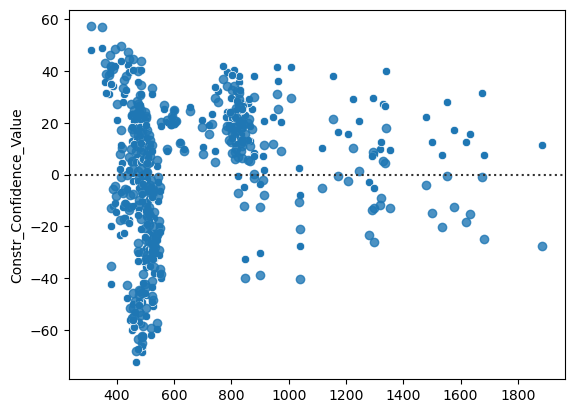

In [63]:
import seaborn as sns

y_true = Merged_df_IE['Constr_Confidence_Value']
y_pred = model.predict(X)  

sns.scatterplot(x=y_pred, y=y_true)
sns.residplot(x=y_pred, y=(y_true - y_pred))

3.3 - GridsearchCV best parameters

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Separate the features (independent variables) and target variable (dependent variable)
X = Merged_df_IE[['Producer_Price_Percent_change', 'Industry_Prod_index']]
y = Merged_df_IE['Constr_Confidence_Value']

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', LinearRegression())  # Linear Regression model
])

# Define the hyperparameters and their values to search
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__normalize': [True, False]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Get the best model and best hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best model and best hyperparameters
print("Best Model:", best_model)
print("Best Parameters:", best_params)


Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 LinearRegression(fit_intercept=False, normalize=True))])
Best Parameters: {'regressor__fit_intercept': False, 'regressor__normalize': True}


AFter GridSearchCV, apply the parameters to the model and check new result

In [65]:
from sklearn.linear_model import LinearRegression

# Separate the features (independent variables) and target variable (dependent variable)
X = Merged_df_IE[['Producer_Price_Percent_change', 'Industry_Prod_index']]
y = Merged_df_IE['Constr_Confidence_Value']

# Create and fit the Linear Regression model with the best hyperparameters
best_regressor = LinearRegression(fit_intercept=best_params['regressor__fit_intercept'],
                                  normalize=best_params['regressor__normalize'])
best_regressor.fit(X, y)

# Make predictions on the scaled testing data
y_pred = best_regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 616.107660858129
R-squared: 0.13893522657903734


Random Forest

In [66]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Separate the independent variables and dependent variable
X = Merged_df_IE[['Producer_Price_Percent_change', 'Industry_Prod_index']]
y = Merged_df_IE['Constr_Confidence_Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 455.39504678217247
R-squared: 0.36354527351865773


Gradient Booster

In [67]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Separate the independent variables and dependent variable
X = Merged_df_IE[['Producer_Price_Percent_change', 'Industry_Prod_index']]
y = Merged_df_IE['Constr_Confidence_Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 372.3431328111959
R-squared: 0.47961764532781714


3.5 Visualisation of GradientBoostingRegressor results 

<AxesSubplot:xlabel='Constr_Confidence_Value'>

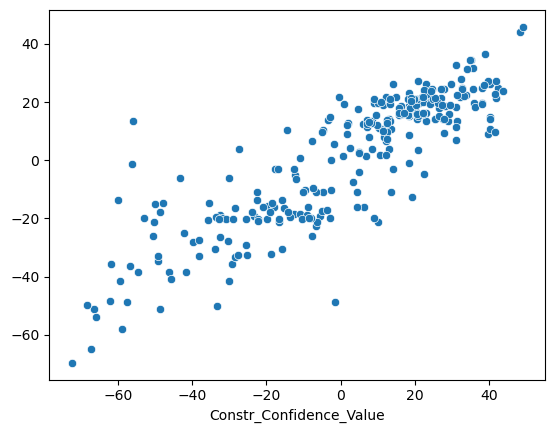

In [68]:
y_true = Merged_df_IE['Constr_Confidence_Value']
y_pred = model.predict(X) 

sns.scatterplot(x=y_true, y=y_pred)



3.6- RandomizedSearchCV Hyperparameter tuning

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import uniform

# Separate the features (independent variables) and target variable (dependent variable)
X = Merged_df_IE[['Producer_Price_Percent_change', 'Industry_Prod_index']]
y = Merged_df_IE['Constr_Confidence_Value']

# Create a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', GradientBoostingRegressor())  # Gradient Boosting Regressor
])

# Define the hyperparameters and their distributions to search
param_dist = {
    'regressor__n_estimators': range(50, 200, 10),
    'regressor__learning_rate': uniform(0.01, 0.2),
    'regressor__max_depth': range(3, 10),
    'regressor__min_samples_split': range(2, 10),
    'regressor__min_samples_leaf': range(1, 5),
    'regressor__subsample': uniform(0.5, 0.5),
    'regressor__max_features': ['sqrt', 'log2', None]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X, y)

# Get the best model and best hyperparameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best model and best hyperparameters
print("Best Model:", best_model)
print("Best Parameters:", best_params)


Best Model: Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.10931223813661554,
                                           max_features='log2',
                                           min_samples_split=4, n_estimators=70,
                                           subsample=0.6946008393670815))])
Best Parameters: {'regressor__learning_rate': 0.10931223813661554, 'regressor__max_depth': 3, 'regressor__max_features': 'log2', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 4, 'regressor__n_estimators': 70, 'regressor__subsample': 0.6946008393670815}


Check for new R2 score after incorporating the RandomizedSearchCV

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate the features (independent variables) and target variable (dependent variable)
X = Merged_df_IE[['Producer_Price_Percent_change', 'Industry_Prod_index']]
y = Merged_df_IE['Constr_Confidence_Value']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply feature scaling to the training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the Gradient Boosting Regressor with the best hyperparameters
best_regressor = GradientBoostingRegressor(n_estimators=best_params['regressor__n_estimators'],
                                           learning_rate=best_params['regressor__learning_rate'],
                                           max_depth=best_params['regressor__max_depth'],
                                           min_samples_split=best_params['regressor__min_samples_split'],
                                           min_samples_leaf=best_params['regressor__min_samples_leaf'],
                                           subsample=best_params['regressor__subsample'],
                                           max_features=best_params['regressor__max_features'])
best_regressor.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_regressor.predict(X_test_scaled)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.5117440265255462


In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Separate the features (independent variables) and target variable (dependent variable)
X = Merged_df_IE[['Producer_Price_Percent_change', 'Industry_Prod_index']]
y = Merged_df_IE['Constr_Confidence_Value']

# Create the model and preprocessing steps
model = GradientBoostingRegressor()
scaler = StandardScaler()

# Create the pipeline with preprocessing and model
pipeline = make_pipeline(scaler, model)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

# Calculate the average R2 score
avg_r2_score = cv_scores.mean()

# Print the average R2 score
print("Average R-squared:", avg_r2_score)


Average R-squared: -1.5669256345971607


Support Vector Regression

In [72]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Separate the independent variables and dependent variable
X = Merged_df_IE[['Producer_Price_Percent_change', 'Industry_Prod_index']]
y = Merged_df_IE['Constr_Confidence_Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Support Vector Regression (SVR) model
model = SVR()

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Undo the scaling on predictions if needed
# y_pred = scaler.inverse_transform(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 539.5706538206417
R-squared: 0.24590244158048846


Neural Network

In [73]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Separate the independent variables and dependent variable
X = Merged_df_IE[['Producer_Price_Percent_change', 'Industry_Prod_index']]
y = Merged_df_IE['Constr_Confidence_Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Neural Network (Multilayer Perceptron) model
model = MLPRegressor(random_state=42)

# Fit the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_scaled)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 479.35558616377847
R-squared: 0.330058307320363


4.1 - Dashboard

In [74]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd



# Create the Dash app
app = dash.Dash(__name__)

# Define the layout
app.layout = html.Div(
    children=[
        html.H1('Interactive Dashboard'),
        dcc.Graph(
            id='line-chart',
            figure={
                'data': [
                    {'x': Merged_df_IE['TIME_PERIOD'], 'y': Merged_df_IE['Constr_Confidence_Value'], 'type': 'line', 'name': 'Construction Confidence Value'},
                    {'x': Merged_df_IE['TIME_PERIOD'], 'y': Merged_df_IE['Producer_Price_Percent_change'], 'type': 'line', 'name': 'Producer Price Percent Change'},
                    {'x': Merged_df_IE['TIME_PERIOD'], 'y': Merged_df_IE['Industry_Prod_index'], 'type': 'line', 'name': 'Industry Production Index'},
                    {'x': Merged_df_IE['TIME_PERIOD'], 'y': Merged_df_IE['Constr_cost_index'], 'type': 'line', 'name': 'Construction Cost Index'}
                ],
                'layout': {
                    'title': 'Time Series Data',
                    'xaxis': {'title': 'Time Period'},
                    'yaxis': {'title': 'Value'}
                }
            }
        )
    ]
)

# Run the app
if __name__ == '__main__':
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [26/May/2023 22:54:16] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 22:54:16] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 22:54:16] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 22:54:16] "GET /_favicon.ico?v=2.9.3 HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 22:54:16] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [26/May/2023 22:54:16] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
